### Data Dictionary

- **step** - a unit of time in the real world. In this case 1 step is 1 hour of time.

- **type** - type of transaction: CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

- **amount** - amount of the transaction.

- **nameOrig** - initiator of the transaction

- **oldbalanceOrg** - balance before the transaction

- **newbalanceOrig** - balance after the transaction

- **nameDest** - recipient of the transaction

- **oldbalanceDest** - initial balance of recipient before the transaction.

- **newbalanceDest** - new balance of recipient after the transaction

- **isFraud** - the transactions made by the fraudulent agents inside the simulation.

- **isFlaggedFraud** - the transacton that is flagged for illegal attempts which invole more than 200,000 in a single transaction.

### Load the data

Import libraries

In [1]:
import uuid
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import dataset 

In [2]:
df = pd.read_csv('Fraud.csv')

View columns of dataset and check the data type for each column

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Preview the dataset

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Preview and analyze the data

Check for missing values in dataset

In [5]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Filter unnecessary column and standardize the naming

In [6]:
df.rename(columns={'oldbalanceOrg': 'oldbalanceOrig'}, inplace=True)
df.drop('isFlaggedFraud', axis=1, inplace=True)

View the statistical summary of numerical variables

In [7]:
df.describe()

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [8]:
df[['amount', 'oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest', 'isFraud']].agg(['min', 'max'])

,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,isFraud
min,0.00,0.00,0.00,0.000000e+00,0
max,92445516.64,59585040.37,49585040.37,3.560159e+08,1


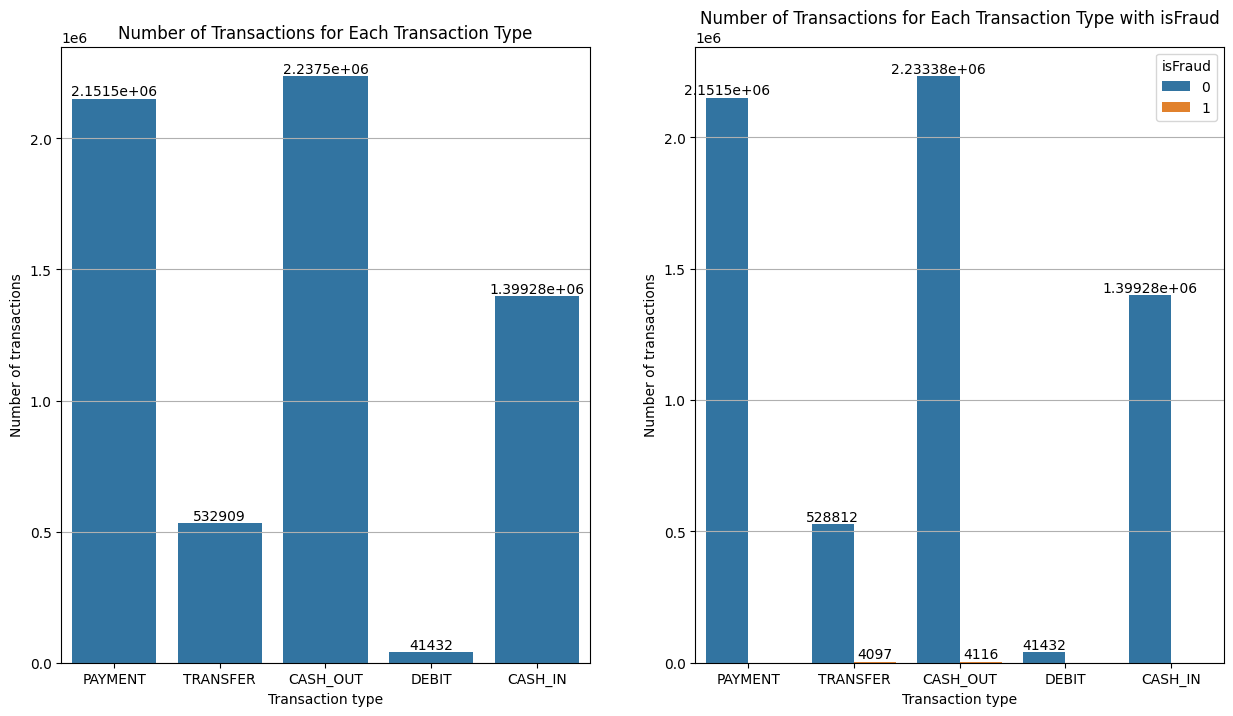

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))

sns.countplot(x='type', data=df, ax=ax[0])
for count in ax[0].containers:
    ax[0].bar_label(count)
ax[0].set_title('Number of Transactions for Each Transaction Type')
ax[0].set_xlabel('Transaction type')
ax[0].set_ylabel('Number of transactions')
ax[0].grid(axis='y')

sns.countplot(x='type', data=df, hue='isFraud', ax=ax[1])
for count in ax[1].containers:
    ax[1].bar_label(count)
ax[1].set_title('Number of Transactions for Each Transaction Type with isFraud')
ax[1].set_xlabel('Transaction type')
ax[1].set_ylabel('Number of transactions')
ax[1].grid(axis='y')

Count the proportion of fraudulent activities for the transaction types of **TRANSFER** and **CASH_OUT**

In [10]:
fraud_portion = df.loc[df['type'].isin(["TRANSFER", "CASH_OUT"])].drop(['step', 'nameOrig', 'nameDest'], axis=1)
pd.crosstab(index=fraud_portion['type'], columns=fraud_portion['isFraud'], margins=True)

isFraud,0,1,All
type,,,
CASH_OUT,2233384,4116,2237500
TRANSFER,528812,4097,532909
All,2762196,8213,2770409


Check the top 10 maximum amounts of transactions:

In [11]:
df.nlargest(10, ['amount'])

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
3686583,276,TRANSFER,92445516.64,C1715283297,0.0,0.0,C439737079,9.595980e+03,9.245511e+07,0
4060598,300,TRANSFER,73823490.36,C2127282686,0.0,0.0,C753026640,9.362401e+07,1.674475e+08,0
4146397,303,TRANSFER,71172480.42,C2044643633,0.0,0.0,C84111522,1.134615e+08,1.846340e+08,0
3946920,286,TRANSFER,69886731.30,C1425667947,0.0,0.0,C167875008,1.515387e+08,2.214254e+08,0
3911956,284,TRANSFER,69337316.27,C1584456031,0.0,0.0,C1472140329,1.130072e+08,1.823446e+08,0
3937152,286,TRANSFER,67500761.29,C811810230,0.0,0.0,C1757599079,8.635615e+07,1.538569e+08,0
4105338,302,TRANSFER,66761272.21,C420748282,0.0,0.0,C1073241084,6.874206e+07,1.355033e+08,0
3892529,284,TRANSFER,64234448.19,C1139847449,0.0,0.0,C65111466,6.597691e+07,1.663021e+08,0
3991638,298,TRANSFER,63847992.58,C300140823,0.0,0.0,C514940761,7.217149e+07,1.360195e+08,0
4143801,303,TRANSFER,63294839.63,C372535854,0.0,0.0,C1871605747,7.512528e+07,1.384201e+08,0


### Prepare the data for modeling

Add new features to the data, filter unnecessary transaction types, and select a subset of the non-fraud transactions with undersampling

In [12]:
seed = 100

fraud_isFraud = fraud_portion[fraud_portion.isFraud == 1]
fraud_not_isFraud = fraud_portion[fraud_portion.isFraud == 0].sample(frac=10/100, random_state=seed)
fraud_data_sample = pd.concat([fraud_isFraud, fraud_not_isFraud])
fraud_data_sample['origzeroFlag'] = np.where(fraud_data_sample['oldbalanceOrig']==0.0, 1, 0)
fraud_data_sample['destzeroFlag'] = np.where(fraud_data_sample['newbalanceDest']==0.0, 1, 0)
fraud_data_sample['amountError'] = round((df['newbalanceDest']-df['oldbalanceDest']-df['amount']))
fraud_data_sample['id'] = [uuid.uuid4() for _ in range(len(fraud_data_sample.index))]
fraud_data_sample.head()

,type,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,origzeroFlag,destzeroFlag,amountError,id
2,TRANSFER,181.0,181.0,0.0,0.0,0.0,1,0,1,-181.0,c6dbb848-9245-4085-b2fc-f4eb3d446458
3,CASH_OUT,181.0,181.0,0.0,21182.0,0.0,1,0,1,-21363.0,fede2684-4545-4d34-8df9-c351fc314363
251,TRANSFER,2806.0,2806.0,0.0,0.0,0.0,1,0,1,-2806.0,e931189e-a3fb-44ee-b0e0-8488a01afd0c
252,CASH_OUT,2806.0,2806.0,0.0,26202.0,0.0,1,0,1,-29008.0,6b93b056-1787-45ed-a34d-015a5d14f557
680,TRANSFER,20128.0,20128.0,0.0,0.0,0.0,1,0,1,-20128.0,3d5b204c-1c61-4cab-9003-c0914f1d7820


Create a test dataframe, **fraud_data_test**, by selecting a random sample of 20%:

In [13]:
fraud_data_test = fraud_data_sample.sample(frac=20/100, random_state=seed)

In [14]:
fraud_data_model = fraud_data_sample[~fraud_data_sample.isin(fraud_data_test.drop_duplicates()).all(axis=1)].copy()
fraud_data_model.sample(10)

,type,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,origzeroFlag,destzeroFlag,amountError,id
4681488,CASH_OUT,37006.85,0.0,0.00,77991.97,114998.81,0,1,0,-0.0,6c792421-e6aa-4003-a038-986f3a98fd15
5074163,CASH_OUT,125514.12,0.0,0.00,1302821.11,1428335.23,0,1,0,-0.0,e562f4cc-7f09-4793-9669-134e7a91e1d4
2351466,CASH_OUT,389.50,0.0,0.00,101197.81,101587.31,0,1,0,0.0,324c5736-8ad7-44f9-956f-b97081285cd8
3821569,CASH_OUT,137787.04,0.0,0.00,173163.98,310951.02,0,1,0,0.0,9c6bf13f-713b-4da2-a958-d293adca6ebf
690919,CASH_OUT,266843.58,1485.0,0.00,0.00,266843.58,0,0,0,0.0,81cc7307-4449-470e-a52b-ecbb3b750814
958913,CASH_OUT,271421.07,0.0,0.00,434098.81,705519.87,0,1,0,-0.0,a9b7c183-1786-44cf-8113-eddedf607ebd
4305584,CASH_OUT,311083.78,0.0,0.00,471056.62,782140.40,0,1,0,0.0,69d30405-96d9-46d3-9e02-ade3616eab66
2800026,CASH_OUT,54155.35,0.0,0.00,605728.05,659883.40,0,1,0,-0.0,bef2908c-d65e-4aa1-93df-9d7623aa1d29
4118797,CASH_OUT,376113.60,22422.0,0.00,4730.91,380844.52,0,0,0,0.0,d64d5606-8c28-4074-9719-57e529c1393e
5893799,CASH_OUT,155190.76,875076.0,719885.24,0.00,155190.76,0,0,0,0.0,8c58b663-c15e-4797-8609-02535e72cb10


### Train an unsupervised model to detect anomalies

Import libraries

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

Set up a dataframe, **X**, to apply k-means clustering algorithm

In [16]:
X = fraud_data_model.drop(['isFraud', 'id'], axis=1)
X['type'] = LabelEncoder().fit_transform(X['type'])

X.sample(10)

,type,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,origzeroFlag,destzeroFlag,amountError
2870690,0,190788.37,21202.00,0.00,1687670.79,1878459.15,0,0,-0.0
4235777,0,150886.07,0.00,0.00,4106425.76,4257311.83,1,0,0.0
3719306,0,16632.90,0.00,0.00,402399.87,419032.77,1,0,0.0
1802483,0,190009.51,107832.00,0.00,0.00,190009.51,0,0,0.0
1325511,1,417217.89,417217.89,0.00,0.00,0.00,0,1,-417218.0
4611922,0,140663.49,0.00,0.00,829510.52,970174.01,1,0,0.0
1924340,0,112881.87,0.00,0.00,131866.74,244748.61,1,0,0.0
5810829,1,503988.29,0.00,0.00,1331628.32,1835616.61,1,0,0.0
144202,0,265876.47,323263.04,57386.57,646312.67,912189.14,0,0,0.0
1391431,0,261729.37,0.00,0.00,1891447.09,2153176.46,1,0,-0.0


In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227546 entries, 2 to 3221901
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   type            227546 non-null  int64  
 1   amount          227546 non-null  float64
 2   oldbalanceOrig  227546 non-null  float64
 3   newbalanceOrig  227546 non-null  float64
 4   oldbalanceDest  227546 non-null  float64
 5   newbalanceDest  227546 non-null  float64
 6   origzeroFlag    227546 non-null  int64  
 7   destzeroFlag    227546 non-null  int64  
 8   amountError     227546 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 17.4 MB


Find the likely values for k by plotting the Elbow Curve

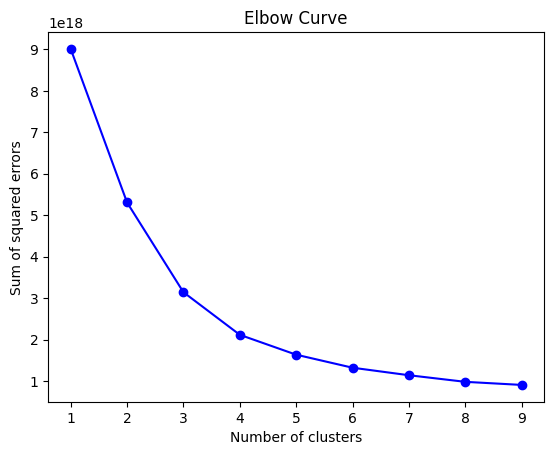

In [18]:
# Find the optimal number of clusters (k) using the elbow method
sse = [] # Sum of squared errors
k_range = range(1, 10)
for k in k_range:
    km = KMeans(n_clusters=k).fit(X)
    sse.append(km.inertia_)
 
# Plot the elbow curve
plt.plot(k_range, sse, '-bo')
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors')
plt.show()

In [19]:
# Choose k = 5
k = 5

# Train the k-means clustering model on the features (X)
kmeans = KMeans(n_clusters=k, random_state=seed)
kmeans.fit(X)
from sklearn.metrics import davies_bouldin_score
print(davies_bouldin_score(X, kmeans.labels_))

0.5979426928660148


Score the test data, **fraud_data_test**, using this model and see the number of fraud events in each **centroid_id**. The clustering algorithms create homogeneous groups of observations. In this query, **kmeans.predict** will call the model and generate the **centroid_id** for each transaction in the test data.

In [20]:
X_test = fraud_data_test.drop(['isFraud', 'id'], axis=1)
X_test['type'] = LabelEncoder().fit_transform(X_test['type'])

centroid_id_pred = kmeans.predict(X_test)
fraud_data_test_pred = fraud_data_test.copy()
fraud_data_test_pred['centroid_id_pred'] = centroid_id_pred
fraud_data_test_pred.groupby('centroid_id_pred').agg(fruad_cnt=('isFraud', 'sum'), total_cnt=('isFraud', 'count')).reset_index()

,centroid_id_pred,fruad_cnt,total_cnt
0,0,165,8780
1,1,1,286
2,2,22,2147
3,3,0,17
4,4,1451,45657


In [21]:
fraud_data_test_pred.head()

,type,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,origzeroFlag,destzeroFlag,amountError,id,centroid_id_pred
939941,TRANSFER,202883.68,0.0,0.0,7359131.30,7562014.98,0,1,0,0.0,40bc3f70-a8b4-4f1e-845c-e2379efaca4d,0
1982565,CASH_OUT,191328.31,0.0,0.0,509280.72,439036.61,0,1,0,-261572.0,3202ba17-5aa2-4e67-b76a-4c733c35091e,4
5707542,CASH_OUT,98652.34,0.0,0.0,3767083.99,3865736.33,0,1,0,-0.0,cae855a1-9e88-4338-a60a-8845f21af276,0
1121172,CASH_OUT,285909.27,154242.0,0.0,81254.66,367163.93,0,0,0,0.0,b562e413-469b-4c95-a19a-e439fa622197,4
1841993,CASH_OUT,91658.39,0.0,0.0,3731741.88,3823400.27,0,1,0,0.0,39e48840-d0f0-4efb-bc69-08a066e2ae8f,0


### Train supervised models using Logistic Regression and Gradient Boosted Tree

Train the logistic regression model

In [22]:
X = fraud_data_model.copy()
X.drop(columns=['origzeroFlag', 'destzeroFlag', 'amountError', 'id'], inplace=True)
X['type'] = LabelEncoder().fit_transform(X['type'])
y = X.pop('isFraud')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20/100, random_state=seed)

# Create and fit the logistic regression model
logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(X_train, y_train)

aggregate_scores = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']
for score in aggregate_scores:
    scores = cross_val_score(logistic_regression_model, X, y, scoring=score, n_jobs=-1)
    print('Mean {} score: {:.3f} ({:.3f})'.format(score, scores.mean(), scores.std()))

Mean precision score: 0.924 (0.008)
Mean recall score: 0.589 (0.021)
Mean accuracy score: 0.987 (0.001)
Mean f1 score: 0.719 (0.016)
Mean roc_auc score: 0.981 (0.004)


Train the gradient boosted regression trees model

In [23]:
X = fraud_data_model.copy()
X.drop(columns=['origzeroFlag', 'destzeroFlag', 'amountError', 'id'], inplace=True)
X['type'] = LabelEncoder().fit_transform(X['type'])
y = X.pop('isFraud')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20/100, random_state=seed)

# Create and fit the Gradient Boosting Classifier model
boosted_tree_model = GradientBoostingClassifier(random_state=seed)
boosted_tree_model.fit(X_train, y_train)

for score in aggregate_scores:
    scores = cross_val_score(boosted_tree_model, X, y, scoring=score, n_jobs=-1)
    print('Mean {} score: {:.3f} ({:.3f})'.format(score, scores.mean(), scores.std()))

Mean precision score: 0.977 (0.004)
Mean recall score: 0.780 (0.015)
Mean accuracy score: 0.993 (0.000)
Mean f1 score: 0.867 (0.010)
Mean roc_auc score: 0.997 (0.003)


### Evaluate both unsupervised and supervied models

Initially, the k-means clustering is applied to identify anomalies - suspicious transactions that deviate from the norm. Then, by adding more variables and training a model, **logistic_regression_model**, using logistic regression, explainnatory variable **isFraud** could be estimated with good model precision. Eventually, the boosted tree model, **boosted_tree_model**, performs better by comparing the performance tables. Adding the new, additional features improved the model's accuracy.

### Predict fraudulent transactions on test data

Boosted tree model is selected to predict the variabel **isFraud** in the dataframe **X_test**

In [24]:
X_test = fraud_data_test.drop(['origzeroFlag', 'destzeroFlag', 'amountError', 'id', 'isFraud'], axis=1)
X_test['type'] = LabelEncoder().fit_transform(X_test['type'])
isFraud_predict = boosted_tree_model.predict(X_test)
predicted_probs = boosted_tree_model.predict_proba(X_test)[:, 1]

# Create a DataFrame with predictions and actual values
results = pd.DataFrame({
    'id': fraud_data_test['id'],
    'predicted': isFraud_predict,
    'actual': fraud_data_test['isFraud'],
    'prob': predicted_probs
})

# Filter results where predicted label is 1 and probability > 0.5
filtered_results = results[(results['predicted'] == 1) & (results['prob'] > 0.5)]

# Display the filtered results
filtered_results.sample(10)

,id,predicted,actual,prob
6168697,0871a264-6adb-4405-8a3a-44b81d0424fb,1,1,0.995552
1030390,c6425996-5223-4281-86f5-4d4e7529d851,1,1,0.997542
6020334,6d5f6ab1-eda8-496b-bdfb-a70ded156434,1,1,0.993443
6166979,69dbc521-e988-4237-9afd-00428c6d9582,1,1,0.998734
1262331,1476298f-26f2-42e1-856f-e38e0b605e3d,1,1,0.997542
1048895,e44e39da-baa9-4830-9045-6d8fe1dafff2,1,1,0.995552
6064028,b031deee-8aa5-4617-9c14-5a3a01374f69,1,1,0.996104
6281802,962a5ef7-bc8e-4e33-95de-04d6ca15ff42,1,1,0.997542
6296627,756480ca-3a02-453e-b11f-c607ce6d4c1d,1,1,0.551388
6201410,43e4d3fa-b085-4dee-9c95-9ed7bd72211d,1,1,0.997542


In [25]:
fraud_data_test_pred = fraud_data_test.copy()
fraud_data_test_pred['isFraud_predict'] = isFraud_predict
fraud_data_test_pred.agg(fruad_cnt=('isFraud_predict', 'sum'), total_cnt=('isFraud_predict', 'count'))

,isFraud_predict
fruad_cnt,1309
total_cnt,56887
